## Observations and Insights 

In [146]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_combined=pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer") 

# Display the data table for preview
mouse_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [147]:
# Checking the number of mice.
mouse_count=mouse_combined["Mouse ID"].nunique()
mouse_count

249

In [148]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=mouse_combined[["Mouse ID", "Timepoint"]].duplicated
print(duplicates)

<bound method DataFrame.duplicated of      Mouse ID  Timepoint
0        k403          0
1        k403          5
2        k403         10
3        k403         15
4        k403         20
...       ...        ...
1888     z969         25
1889     z969         30
1890     z969         35
1891     z969         40
1892     z969         45

[1893 rows x 2 columns]>


In [149]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_all=mouse_combined.duplicated
print(duplicates_all)


<bound method DataFrame.duplicated of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.8

In [150]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#drop duplicates 
mouse_combined_clean=mouse_combined.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")

In [151]:
# Checking the number of mice in the clean DataFrame.
mouse_count_b=mouse_combined_clean["Mouse ID"].nunique()
mouse_count_b

249

## Summary Statistics

In [152]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate 
#the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean=mouse_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_mean
drug_median=mouse_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_median
drug_var=mouse_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_var
drug_std=mouse_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_std
drug_SEM=mouse_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
drug_SEM
# Assemble the resulting series into a single summary dataframe.
tumor_stat= pd.DataFrame({"Mean": drug_mean, "Median":drug_median, "Variance": drug_var,
            "Standard Deviation":drug_std, "SEM": drug_SEM})

tumor_stat

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [153]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_stats=mouse_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
drug_stats

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

In [163]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#mice count per drug regimen
micetodrug_count = mouse_combined_clean.groupby("Drug Regimen")["Mouse ID"].count()

#bar plot: 
mouse_combined_clean.plot.bar(x="Drug Regimen", y=micetodrug_count)


IndexError: index 230 is out of bounds for axis 0 with size 8

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

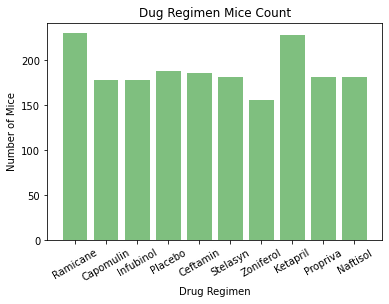

In [165]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = mouse_combined_clean["Drug Regimen"].unique()
plt.bar(x_axis, micetodrug_count, color='g', alpha=.5, align="center")
plt.title("Dug Regimen Mice Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=30, horizontalalignment="center")


In [166]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [205]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#want total female and male numbers in sex_count
#sex_count=mouse_combined_clean["Sex"]
labels=mouse_combined_clean["Sex"]
colors="Purple", "Red"
#plt.pie(sex_count, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
mouse_combined_clean.plot.pie(y=labels, figsize=(5, 5))

KeyError: "None of [Index(['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',\n       'Male',\n       ...\n       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',\n       'Male'],\n      dtype='object', length=1888)] are in the [columns]"

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
